# Generating synthetic data sets of a river bed column forced by monoperiodic river and aquifer temperature signals

**This is the updated demo notebook for `molonari`. Dated 2025**

The object of this demo is to present a class responsible for generating a simulation of pressure and temperature sensor data in cases where data from the CAPTEUR project is not available. Based on the `synthetic_MOLONARI` class in `synthetic_MOLONARI.py`.

We will show the `synthetic_MOLONARI` object which allows generating purely periodic datasets with the possibility of Gaussian noise. We will illustrate the interaction of `synthetic_MOLONARI` with the `Column` class and the `layer` class.

The other demo file `demo_val_direct.ipynb` highlights a more global use of the classes from `synthetic_MOLONARI.py` and `val_analy.py`.


In [1]:
from pyheatmy import *
import matplotlib.pyplot as plt
import numpy as np

## 0. Realistic generation

In [2]:
t_debut = (2011, 8, 1)
t_fin = (2011, 8, 31, 23, 59, 59)
dt = 15*NSECINMIN # pas de temps en (s) # A AMELIORER AVEC UN CONVERTISSEUR AUTOMATIQUE D'UNITES

"""Conditions limites"""
# Température de la rivière
zeroT = 0
zeroT += ZERO_CELSIUS  #time_series works only with forcings in celsius. See if it is deeper in pyheatmy or not

T_riv_amp = 5
T_riv_offset = 20  + zeroT
nday = 1
P_T_riv = nday*NHOURINDAY*4*dt #monthly   period

Define what is your value of $z_\text{bottom}$ first.

In [3]:
Zbottom = 0.4

Enter the charge data at $z_\text{bottom}$.

In [4]:
dH_amp = 0
dH_offset = 0.3 #1meter ?
P_dh = -9999 #14*24*4*dt

First, we generate an artificial aquifier at depth $z_\text{aq}$ and we assume that the column is homogenous, so we can propagate the gradient till the end of the column (i.e up to $z_\text{aq}$)

In [5]:
Z_aq = 8

You should also define what is the temperature of the aquifier.

In [6]:
T_aq_amp = 0
#T_aq_offset = 14 + zeroT
T_aq_offset = T_riv_offset
P_T_aq = -9999 # à mettre dans le init
# Pression différentielle

depth_sensors = [Zbottom, Z_aq]
Zbottom = 0.4

"""Bruit de mesure"""
sigma_meas_P = 0
sigma_meas_T = 0

print("dt={0:.1f}s".format(dt))

dt=900.0s


param_T_riv_signal is a list of list, generating multi periodic signal
Initializing time series of synthetic_MOLONARI
param_time_dates: [(2011, 8, 1), (2011, 8, 31, 23, 59, 59), 900]
param_dH_signal: [[6.0], [0.0, -9999, 0]]
param_T_riv_signal: [[293.15], [5, 86400, 0]]
param_T_aq_signal: [[293.15], [0, -9999, 0]]
sigma_meas_P: 0
sigma_meas_T: 0
No forced bottom temperature, generating all series
Multiple periodic signals detected, summing components with global offset.


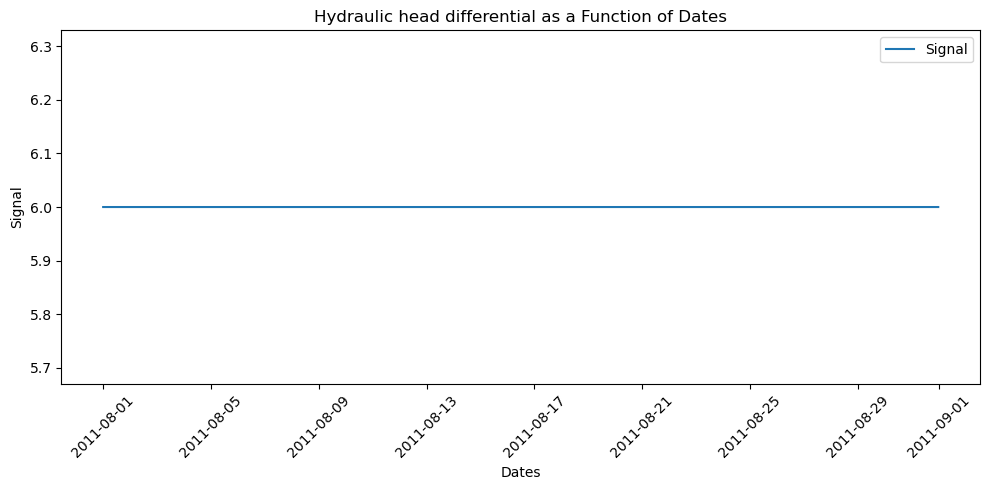

Multiple periodic signals detected, summing components with global offset.


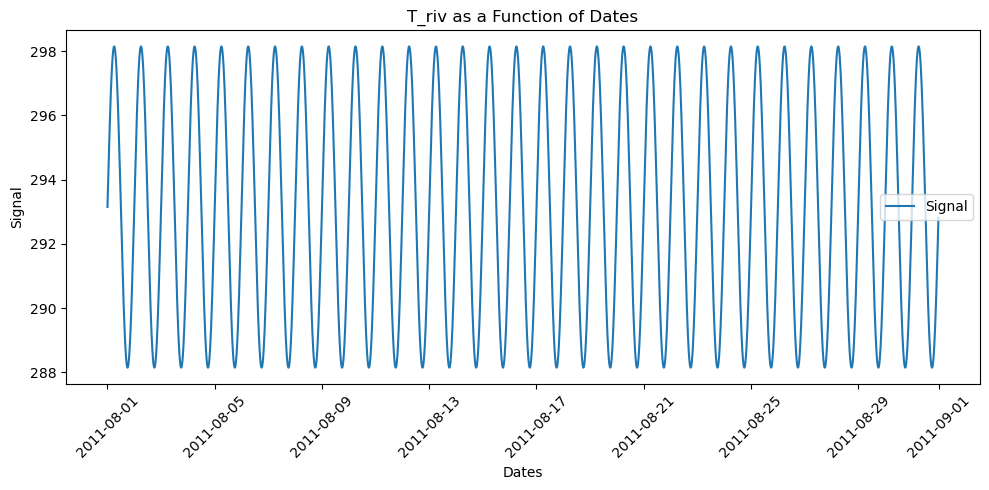

Multiple periodic signals detected, summing components with global offset.


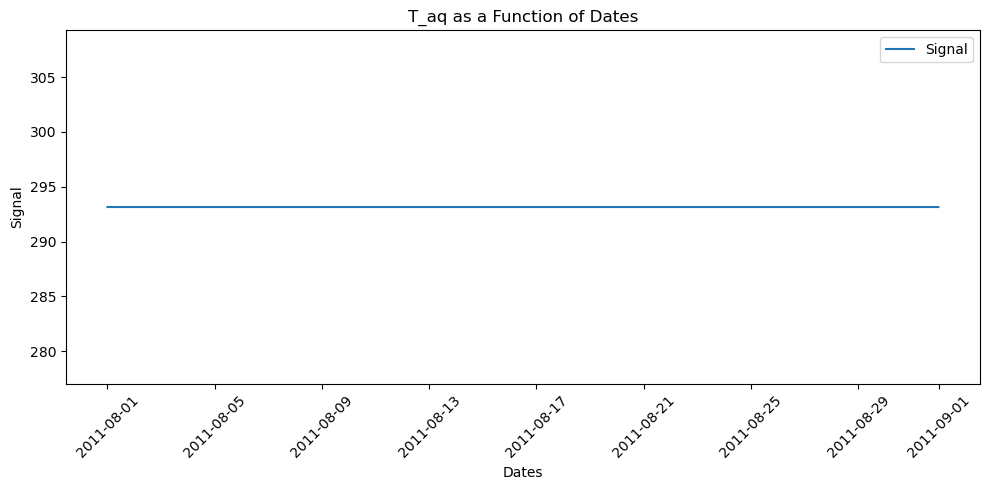

Generating Shaft with 2 sensors
2 sensors in the shaft
Temperature of Sensor 0 : [293.1499939  293.46066895 293.76998138 ... 292.22330322 292.53000641
 292.83931885]
Temperature of Sensor 1 : [293.1499939 293.1499939 293.1499939 ... 293.1499939 293.1499939
 293.1499939]
dH : [(datetime.datetime(2011, 8, 1, 0, 0), (np.float32(6.0), np.float32(293.15))), (datetime.datetime(2011, 8, 1, 0, 15), (np.float32(6.0), np.float32(293.47702))), (datetime.datetime(2011, 8, 1, 0, 30), (np.float32(6.0), np.float32(293.8026))), (datetime.datetime(2011, 8, 1, 0, 45), (np.float32(6.0), np.float32(294.12546))), (datetime.datetime(2011, 8, 1, 1, 0), (np.float32(6.0), np.float32(294.4441))), (datetime.datetime(2011, 8, 1, 1, 15), (np.float32(6.0), np.float32(294.7572))), (datetime.datetime(2011, 8, 1, 1, 30), (np.float32(6.0), np.float32(295.06342))), (datetime.datetime(2011, 8, 1, 1, 45), (np.float32(6.0), np.float32(295.36145))), (datetime.datetime(2011, 8, 1, 2, 0), (np.float32(6.0), np.float32(295.65))

In [7]:
"""Instanciation de l'objet Time_series"""

ratio = Z_aq/Zbottom

# Add-On 2025 : Maintenant on peut créer des signaux multi-périodiques
liste_param_dH = [[dH_offset*ratio], [dH_amp*ratio, P_dh, 0]]
liste_param_T_riv = [[T_riv_offset], [T_riv_amp, P_T_riv, 0]]
liste_param_T_aq = [[T_aq_offset], [T_aq_amp, P_T_aq, 0]]


# un dictionnaire qui facilite le paramétrage avec des variables globales définies plus haut
time_series_dict_user1 = {
    "offset":.0,
    "depth_sensors":depth_sensors,
	"param_time_dates": [t_debut, t_fin, dt], 
    "param_dH_signal": liste_param_dH,
	"param_T_riv_signal": liste_param_T_riv,
    "param_T_aq_signal": liste_param_T_aq,
    "sigma_meas_P": sigma_meas_P,
    "sigma_meas_T": sigma_meas_T, #float
}
# instanciation du simulateur de données
emu_observ_aquifier = synthetic_MOLONARI.from_dict(time_series_dict_user1)

# print("Checking params synthetic_MOLONARI")
# print("param_time_dates:", emu_observ_test_user1._param_dates)
# print("param_dH_signal:", emu_observ_test_user1._param_dH)
# print("param_T_riv_signal:", emu_observ_test_user1._param_T_riv)
# print("param_T_aq_signal:", emu_observ_test_user1._param_T_aq)
# print("sigma_meas_P:", emu_observ_test_user1._sigma_P)
# print("sigma_meas_T:", emu_observ_test_user1._sigma_T)


print(f"dH : {emu_observ_aquifier._molonariP_data}")
print(f"Tshaft : {emu_observ_aquifier._T_Shaft_measures}")


In [8]:
# l'utilisateur génère un dictionnaire avec les données importantes de la colonne
Couche = {
    "name": "Couche en sable",
    "zLow": Zbottom,
    "IntrinK": 10**-12,
    "n": 0.1,
    "lambda_s": 2,
    "rhos_cs": 4e6,
    "q_s": 0,
}

# modèle une couche
Layer1 = Layer.from_dict(Couche)

print(f"Layer: {Layer1}")

nbcells = 1000
# on utilise les mesures générées précédemment dans les init "dH_measures" et "T_measures"
col_dict = {
	"river_bed": Z_aq, 
    "depth_sensors": depth_sensors, #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": emu_observ_aquifier._molonariP_data,
    "T_measures": emu_observ_aquifier._T_Shaft_measures,
    "nb_cells" : nbcells,
    "sigma_meas_P": 0.01, #float
    "sigma_meas_T": 0.1, #float
}
col_aq = Column.from_dict(col_dict,verbose=True)
col_aq.set_layers(Layer1)

Layer: Couche en sable : ends at 0.4 m. Param(IntrinK=1e-12, n=0.1, lambda_s=2, rhos_cs=4000000.0, q_s=0)
Column created with success
Number of time steps: 2976
Time step in days: 0.01041316644265233
T_riv: [293.15    293.47702 293.8026  ... 292.17453 292.49738 292.82297]
T_aq: [293.1499939 293.1499939 293.1499939 ... 293.1499939 293.1499939
 293.1499939]
dH : [6. 6. 6. ... 6. 6. 6.]
list of dates   : [datetime.datetime(2011, 8, 1, 0, 0), datetime.datetime(2011, 8, 1, 0, 15), datetime.datetime(2011, 8, 1, 0, 30), datetime.datetime(2011, 8, 1, 0, 45), datetime.datetime(2011, 8, 1, 1, 0), datetime.datetime(2011, 8, 1, 1, 15), datetime.datetime(2011, 8, 1, 1, 30), datetime.datetime(2011, 8, 1, 1, 45), datetime.datetime(2011, 8, 1, 2, 0), datetime.datetime(2011, 8, 1, 2, 15), datetime.datetime(2011, 8, 1, 2, 30), datetime.datetime(2011, 8, 1, 2, 45), datetime.datetime(2011, 8, 1, 3, 0), datetime.datetime(2011, 8, 1, 3, 15), datetime.datetime(2011, 8, 1, 3, 30), datetime.datetime(2011, 8, 1

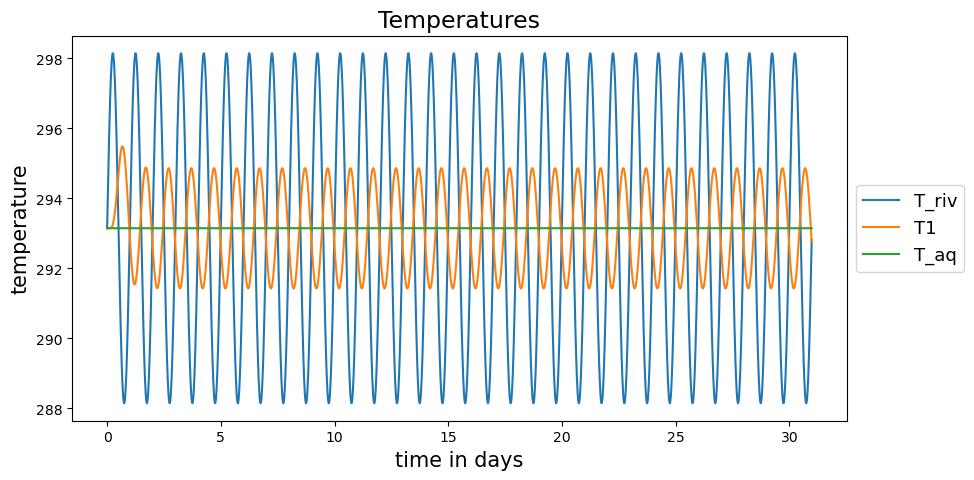

In [9]:
emu_observ_aquifier._measures_column_one_layer(col_aq)
#emu_observ_aquifier._plot_molonariT_data()
col_aq.plot_temperature_at_sensors(verbose=False)

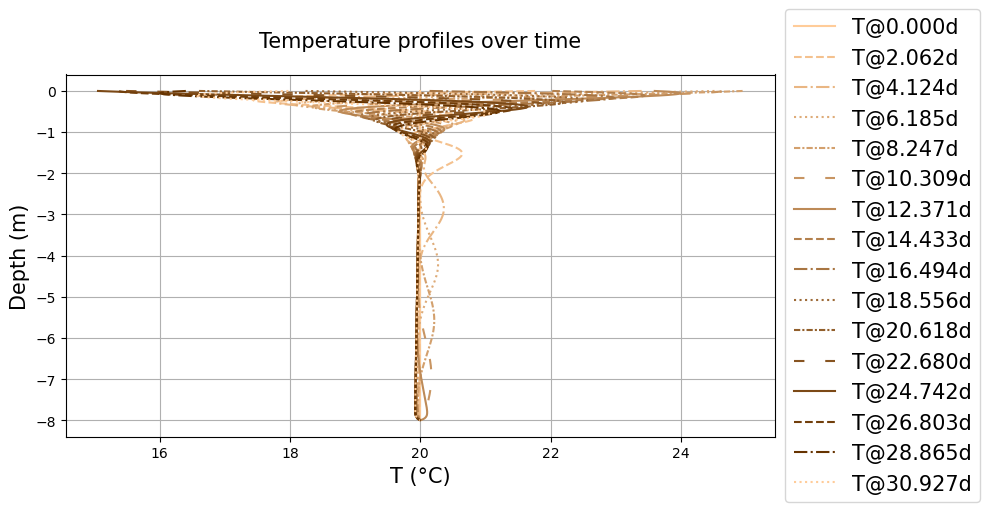

In [10]:
nt = len(col_aq._temperatures[0,:])
dplot=15
col_aq.plot_temperatures_umbrella(round(nt/dplot))

Now extract the temperature at $z_\text{bottom}$

In [11]:
# Extract the temperature corresponding to z = Zbottom
# Extract the temperature corresponding to z = Zbottom
# on veut trouver l'indice le plus proche
z_arr = np.asarray(col_aq._z_solve)
idx_bottom = int(np.argmin(np.abs(z_arr - Zbottom)))

temperature_bottom = col_aq._temperatures[idx_bottom, :]

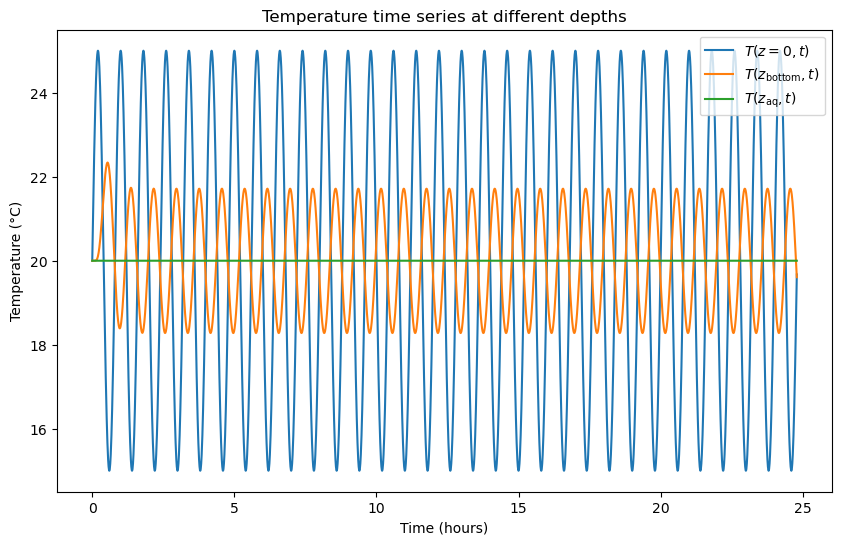

In [12]:
plt.figure(figsize=(10,6))
plt.plot(emu_observ_aquifier._time_array/(3600*30), col_aq._T_riv - ZERO_CELSIUS, label=r'$T(z = 0, t)$')
plt.plot(emu_observ_aquifier._time_array/(3600*30), temperature_bottom - ZERO_CELSIUS, label=r'$T(z_\text{bottom}, t)$')
plt.plot(emu_observ_aquifier._time_array/(3600*30), col_aq._T_aq - ZERO_CELSIUS, label=r'$T(z_\text{aq}, t)$')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature time series at different depths')
plt.legend()

Now we can just use the signal of `temperature_bottom` as our synthetic data for the aquifer bottom temperature.

## 1. Signal Parameterization
The signals are purely periodic, and it is necessary to choose the amplitude, period, and mean value of the river temperature, aquifer temperature, and pressure signals (boundary conditions). The T1, T2, T3 sensors in the shaft are only generated using the direct model.

A possible improvement for this class is to generate multi-periodic signals similar to the parameter lists of the layer, where a list of parameters for the different desired frequencies (diurnal, monthly, annual, etc.) would be provided.

**Note that `dt` has been set up with a value of 15 minutes to replicate field experiments conditions**

In [13]:
depth_sensors = [.1, .2, .3, .4]
Zbottom = 0.4

"""Bruit de mesure"""
sigma_meas_P = 0.001
sigma_meas_T = 0.1

print("dt={0:.1f}s".format(dt))

dt=900.0s


**Important remark.** There has been many confusions before on what was the signification of $Z_\text{bottom}$. Note that $Z_\text{bottom}$ is not the depth of the river. It's where the hydraulic charge sensor is positionned. Meaning that the effective gradient :

$$
\dfrac{\mathrm{d}H}{\mathrm{d}z} := \dfrac{\mathrm{d}H}{Z_\text{bottom}}
$$

*If you want to replicate field measurements you should always leave `Zbottom = 0.4`.*

## 2 Instantiating the objects `synthetic_MOLONARI` and `Column`
The generated object will have default values, and a series of methods must be used to update its essential parameters. In the initialisation of Time Series, the 3 intermediate temperature sensors $T_1, T_2, T_3$, are initialized with a linear interpolation between Triv and Taq weighted by the distance from the sensor. Those values initialize the soil Column in a second step. For Time Series $\mathrm{d}H = H_\text{riv}-H_\text{aq}$.

---------

As of 2025, the syntax to create the signals has changed. In fact, now you can create multiperiodic signals.

Say you want to create a simple signal $y(t) = A + B\sin(2\pi t/P + \phi)$, then you would use : `liste_param_T_riv = [[A], [B, P, phi]]`.
Say you want to create a multiperiodic signal $y(t) = A + B\sin(2\pi t/P_1 + \phi_1) + C\sin(2\pi t/P_2 + \phi_2)$: , then you would use : `liste_param_T_riv = [[A], [B, P1, phi1], [C, P2, phi2]]`.
The syntax is :

```python
liste_param_T_riv = [[offset], [ampl1, period1, phase1], ..., [amplN, periodN, phaseN]]
```

param_T_riv_signal is a list of list, generating multi periodic signal
Initializing time series of synthetic_MOLONARI
param_time_dates: [(2011, 8, 1), (2011, 8, 31, 23, 59, 59), 900]
param_dH_signal: [[0.3], [0, -9999, 0]]
param_T_riv_signal: [[293.15], [5, 86400, 0]]
param_T_aq_signal: [[293.15], [0, -9999, 0]]
sigma_meas_P: 0.001
sigma_meas_T: 0.1
USER PROVIDED BOTTOM TEMPERATURE SERIES !
Forcing bottom temperature with provided array
Multiple periodic signals detected, summing components with global offset.


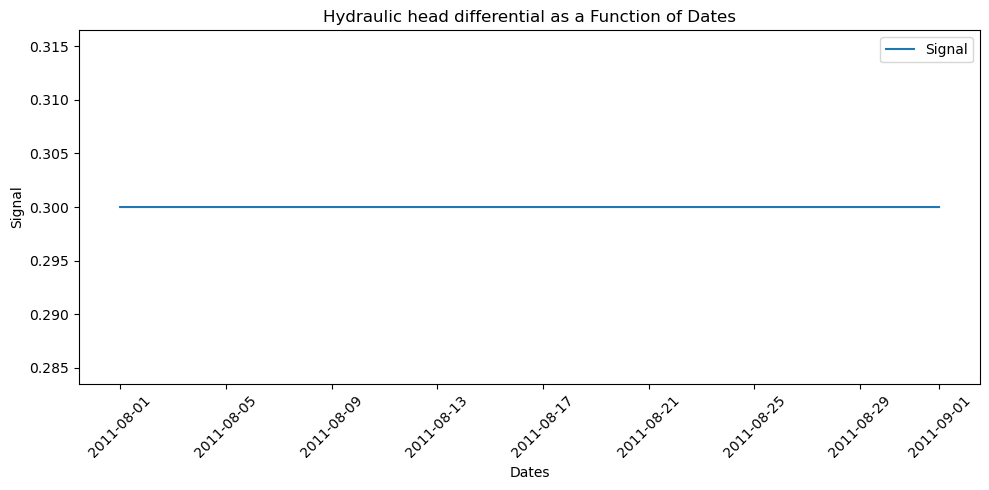

Multiple periodic signals detected, summing components with global offset.


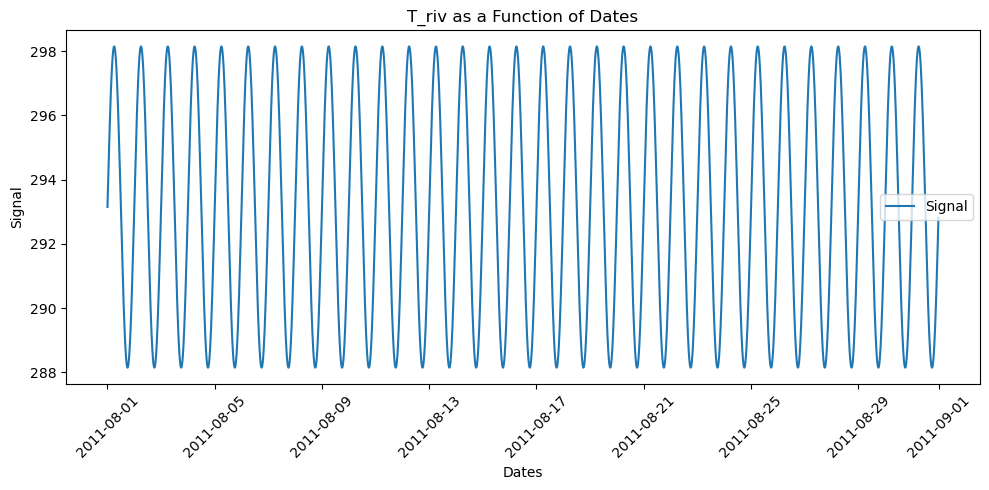

Multiple periodic signals detected, summing components with global offset.


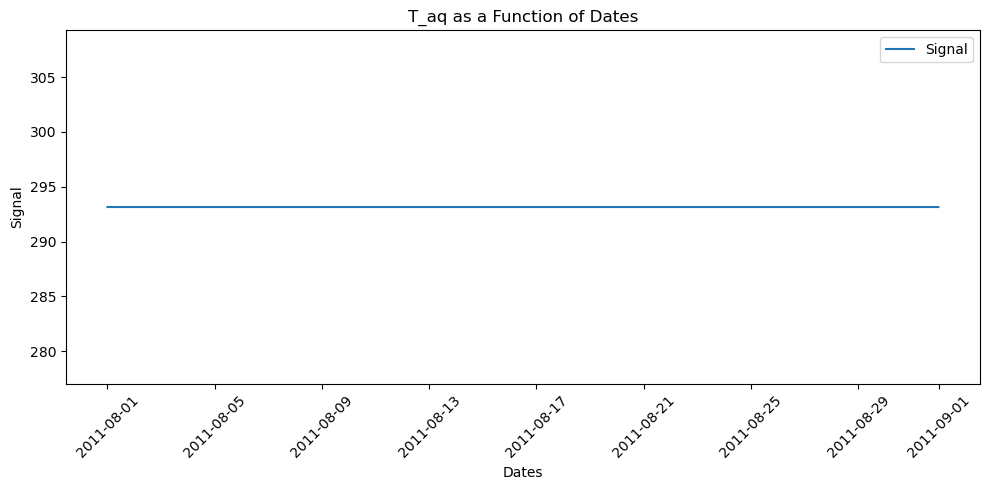

Generating Shaft with 4 sensors
4 sensors in the shaft
Temperature of Sensor 0 : [293.1499939  293.39526367 293.6394577  ... 292.418396   292.66053009
 292.90472412]
Temperature of Sensor 1 : [293.1499939  293.31350708 293.4763031  ... 292.66226196 292.82368469
 292.98648071]
Temperature of Sensor 2 : [293.1499939  293.23175049 293.3131485  ... 292.90612793 292.98683929
 293.0682373 ]
Temperature of Sensor 3 : [293.1499939 293.1499939 293.1499939 ... 293.1499939 293.1499939
 293.1499939]
Generating Shaft with 4 sensors
4 sensors in the shaft
Temperature of Sensor 0 : [293.18501282 293.45729828 293.60116577 ... 292.39099884 292.67008209
 292.74755859]
Temperature of Sensor 1 : [293.17333984 293.35484314 293.45074463 ... 292.58720398 292.73609924
 292.75097656]
Temperature of Sensor 2 : [293.16166687 293.252388   293.30032349 ... 292.78340912 292.80211639
 292.75439453]
Temperature of Sensor 3 : [293.1499939  293.14993286 293.14990234 ... 292.97961426 292.86813354
 292.7578125 ]
dH : [(d

In [14]:
"""Instanciation de l'objet Time_series"""

# Add-On 2025 : Maintenant on peut créer des signaux multi-périodiques
liste_param_dH = [[dH_offset], [dH_amp, P_dh, 0]]
liste_param_T_riv = [[T_riv_offset], [T_riv_amp, P_T_riv, 0]]
liste_param_T_aq = [[T_aq_offset], [T_aq_amp, P_T_aq, 0]]


# un dictionnaire qui facilite le paramétrage avec des variables globales définies plus haut
time_series_dict_user1 = {
    "offset":.0,
    "depth_sensors":depth_sensors,
	"param_time_dates": [t_debut, t_fin, dt], 
    "param_dH_signal": liste_param_dH,
	"param_T_riv_signal": liste_param_T_riv,
    "param_T_aq_signal": liste_param_T_aq,
    "sigma_meas_P": sigma_meas_P,
    "sigma_meas_T": sigma_meas_T, #float
    "array_T_bottom": temperature_bottom,
}
# instanciation du simulateur de données
emu_observ = synthetic_MOLONARI.from_dict(time_series_dict_user1)

# print("Checking params synthetic_MOLONARI")
# print("param_time_dates:", emu_observ_test_user1._param_dates)
# print("param_dH_signal:", emu_observ_test_user1._param_dH)
# print("param_T_riv_signal:", emu_observ_test_user1._param_T_riv)
# print("param_T_aq_signal:", emu_observ_test_user1._param_T_aq)
# print("sigma_meas_P:", emu_observ_test_user1._sigma_P)
# print("sigma_meas_T:", emu_observ_test_user1._sigma_T)


print(f"dH : {emu_observ._molonariP_data}")
print(f"Tshaft : {emu_observ._T_Shaft_measures}")


**Important remark.** The parameter `riverbed` has no link with computing the hydraulic gradient. So what does it mean ? It's the depth of the river column that is generated artificially. So in reality, it's not where a gradient is computed.

For instance, if `riverbed = 1.0`, it means that the simulation will simulate all the profile temperatures up to $1.0$ meter deep. But if `riverbed = 8.0`, it means that the simulation will simulate all the profile temperatures up to $8.0$.

**However,** `riverbed` defines the position where the aquifier is positionned.

In [15]:
# l'utilisateur génère un dictionnaire avec les données importantes de la colonne
Couche = {
    "name": "Couche en sable",
    "zLow": Zbottom,
    "IntrinK": 10**-12,
    "n": 0.1,
    "lambda_s": 2,
    "rhos_cs": 4e6,
    "q_s": 0,
}

# modèle une couche
Layer1 = Layer.from_dict(Couche)

print(f"Layer: {Layer1}")

nbcells = 100
# on utilise les mesures générées précédemment dans les init "dH_measures" et "T_measures"
col_dict = {
	"river_bed": 8, 
    "depth_sensors": depth_sensors, #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": emu_observ._molonariP_data,
    "T_measures": emu_observ._T_Shaft_measures,
    "nb_cells" : nbcells,
    "sigma_meas_P": 0.01, #float
    "sigma_meas_T": 0.1, #float
}
col = Column.from_dict(col_dict,verbose=True)
col.set_layers(Layer1)

Layer: Couche en sable : ends at 0.4 m. Param(IntrinK=1e-12, n=0.1, lambda_s=2, rhos_cs=4000000.0, q_s=0)
Column created with success
Number of time steps: 2976
Time step in days: 0.01041316644265233
T_riv: [293.1967  293.55975 293.7516  ... 292.1948  292.60406 292.74414]
T_aq: [293.00677321 293.05226493 293.05733355 ... 292.95355457 292.82866959
 292.73354995]
dH : [0.29987553 0.29940063 0.29993284 ... 0.29887304 0.3003308  0.29950377]
list of dates   : [datetime.datetime(2011, 8, 1, 0, 0), datetime.datetime(2011, 8, 1, 0, 15), datetime.datetime(2011, 8, 1, 0, 30), datetime.datetime(2011, 8, 1, 0, 45), datetime.datetime(2011, 8, 1, 1, 0), datetime.datetime(2011, 8, 1, 1, 15), datetime.datetime(2011, 8, 1, 1, 30), datetime.datetime(2011, 8, 1, 1, 45), datetime.datetime(2011, 8, 1, 2, 0), datetime.datetime(2011, 8, 1, 2, 15), datetime.datetime(2011, 8, 1, 2, 30), datetime.datetime(2011, 8, 1, 2, 45), datetime.datetime(2011, 8, 1, 3, 0), datetime.datetime(2011, 8, 1, 3, 15), datetime.dat

## 3 Generating temperature in the river bed

We use the [_measures_column_one_layer(col, layers_list)] method, which updates the measurements for T1, T2 and T3 at each point in time with the direct model pyheatmy. The sensor time series are then perturbated with a gaussian noise in the Time series object. We display the temperature simulated at sensors.

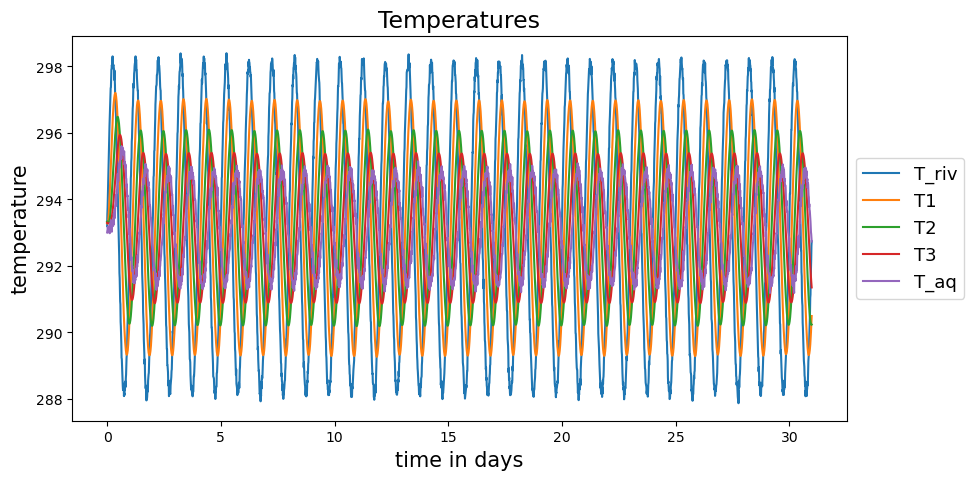

In [16]:

# print(emu_observ_test_user1._T_Shaft)
emu_observ._measures_column_one_layer(col)
#emu_observ_test_user1._plot_molonariT_data()
col.plot_temperature_at_sensors(verbose=False)



### Safety diagnosis

Major problem, the column object only simulates between 0 and Z_bottom.

In [17]:
print("Number of z values in col:", len(col._z_solve))
print("First z value in col:", col._z_solve[0])
print("Last z value in col:", col._z_solve[-1])

Number of z values in col: 100
First z value in col: 0.002
Last z value in col: 0.398


The simulated temperatures with pyheatmy are compared to the initial values of the Shaft which were interpolated. Without surprise, they are very different for an advective configuration (high k value)

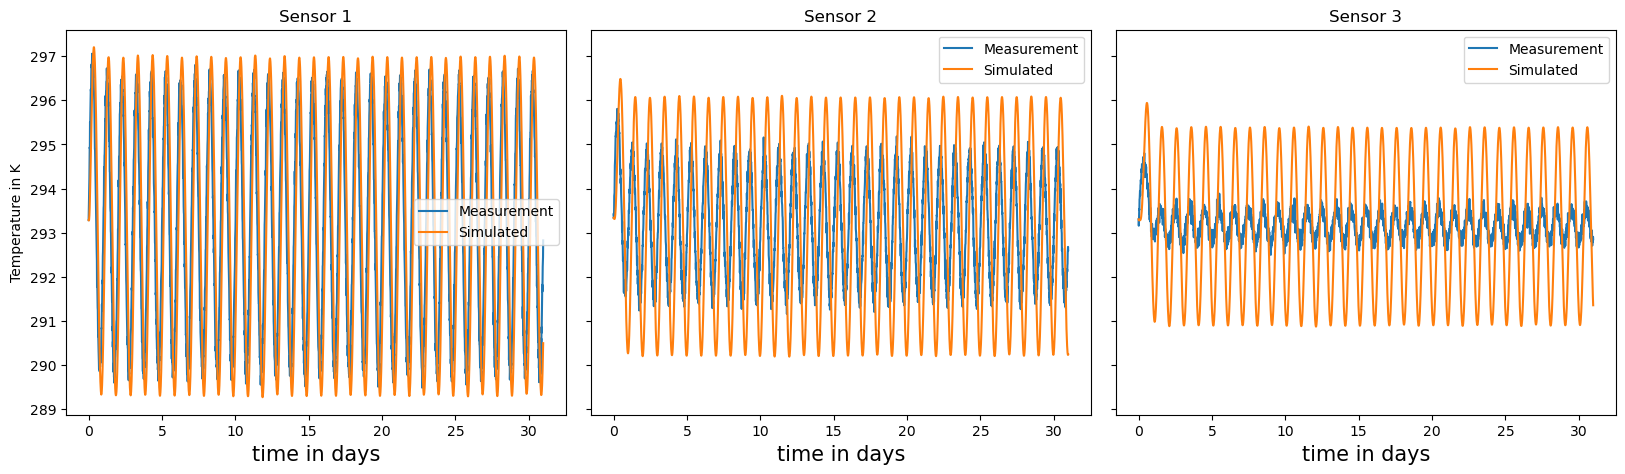

In [18]:

col.plot_compare_temperatures_sensors()

Here are temperature profiles simulated by pyheatmy

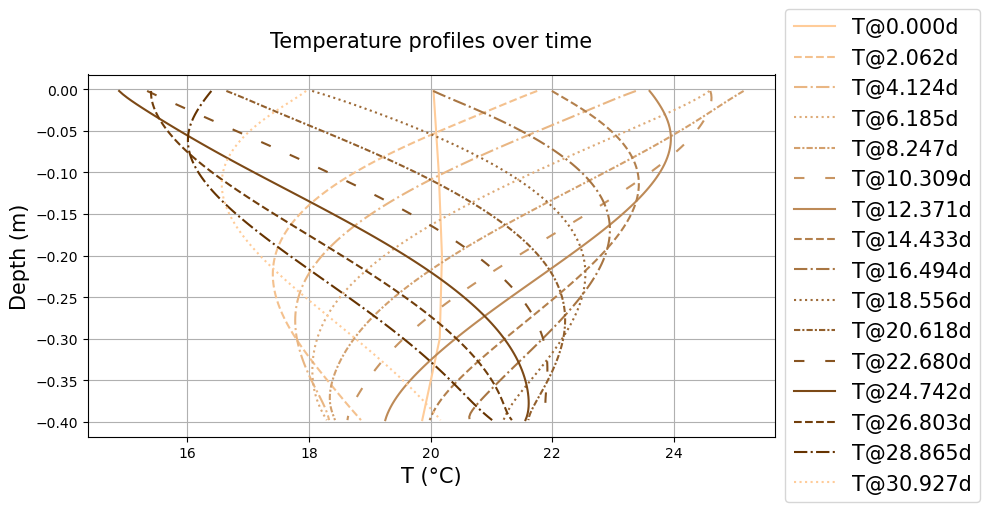

In [19]:
nt = len(col._temperatures[0,:])
dplot=15
col.plot_temperatures_umbrella(round(nt/dplot))



Now creating a new column created with the generated case study

[(datetime.datetime(2011, 8, 1, 0, 0), array([293.27229805, 293.29322105, 293.46359508, 293.17687176])), (datetime.datetime(2011, 8, 1, 0, 15), array([293.27565302, 293.46675209, 292.95334274, 293.26818352])), (datetime.datetime(2011, 8, 1, 0, 30), array([293.33285526, 293.37168258, 293.26670249, 293.02586551])), (datetime.datetime(2011, 8, 1, 0, 45), array([293.28395831, 293.22293681, 293.25001977, 293.1619633 ])), (datetime.datetime(2011, 8, 1, 1, 0), array([293.35135238, 293.12005914, 293.13931975, 293.17148433])), (datetime.datetime(2011, 8, 1, 1, 15), array([293.32744976, 293.14906831, 293.16572451, 293.07777225])), (datetime.datetime(2011, 8, 1, 1, 30), array([293.31506729, 293.29702826, 293.43593345, 293.23859763])), (datetime.datetime(2011, 8, 1, 1, 45), array([293.74226738, 293.29473668, 293.41891508, 293.23190159])), (datetime.datetime(2011, 8, 1, 2, 0), array([293.71110054, 293.17815417, 293.38251313, 293.01558844])), (datetime.datetime(2011, 8, 1, 2, 15), array([293.918498 

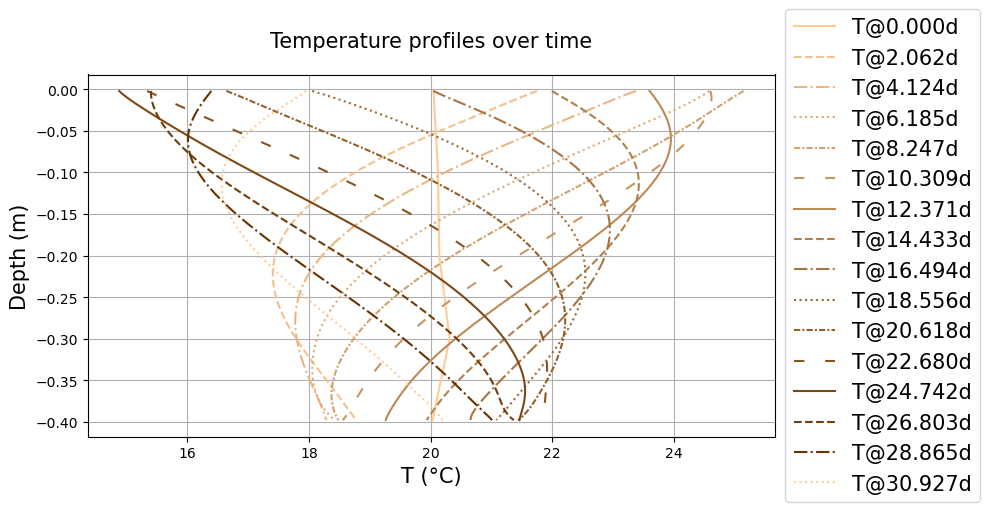

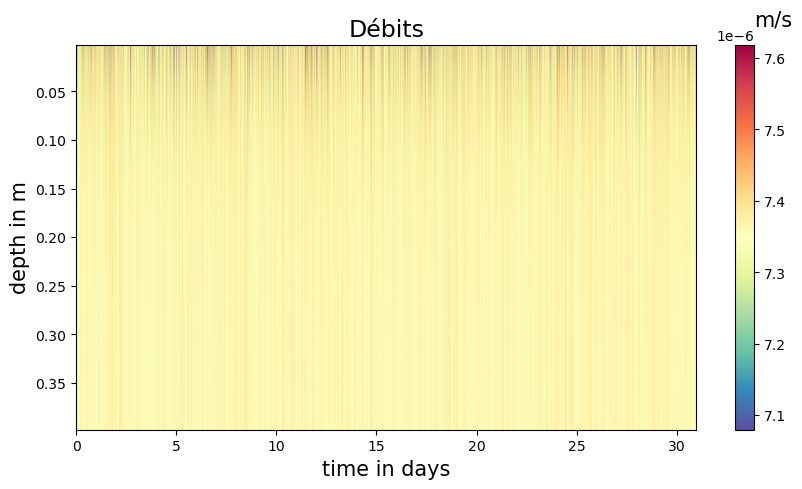

RMSE at sensor 0 : 0.10108737509835894
RMSE at sensor 1 : 0.09986566718397304
RMSE at sensor 2 : 0.09873995766054583
Total RMSE : 0.09990226578208453
Plotting Température in column. time series have nrecords =  2976
Creating /Users/noedaniel/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_P_measures.csv
Creating /Users/noedaniel/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_T_measures.csv
Creating /Users/noedaniel/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_info.csv
File /Users/noedaniel/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_P_measures.csv closed successfully.
File /Users/noedaniel/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_T_measures.csv closed successfully.
File /Users/noedaniel/OUTPUT_MOLONARI1D/generated_data/VirtualPoint/VirtualPoint_info.csv closed successfully.
Creating /Users/noedaniel/OUTPUT_MOLONARI1D/generated_data/VirtualLabo/pressure_sensors/Pvirtual.csv
Printing Sensor file 1
File /Users/noedaniel

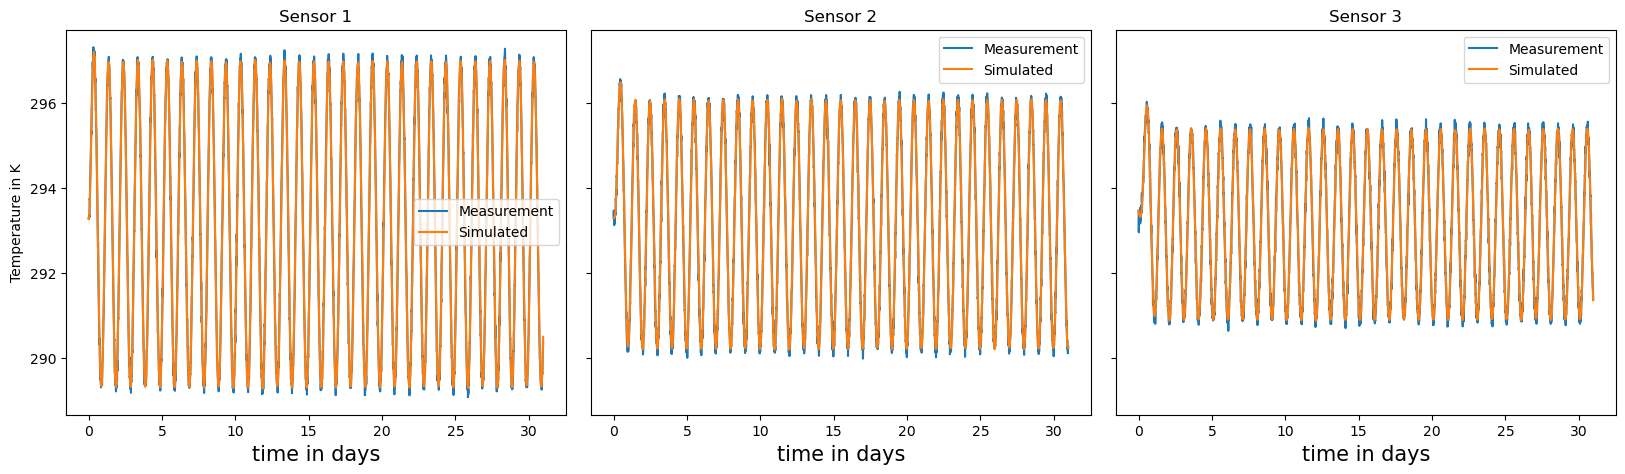

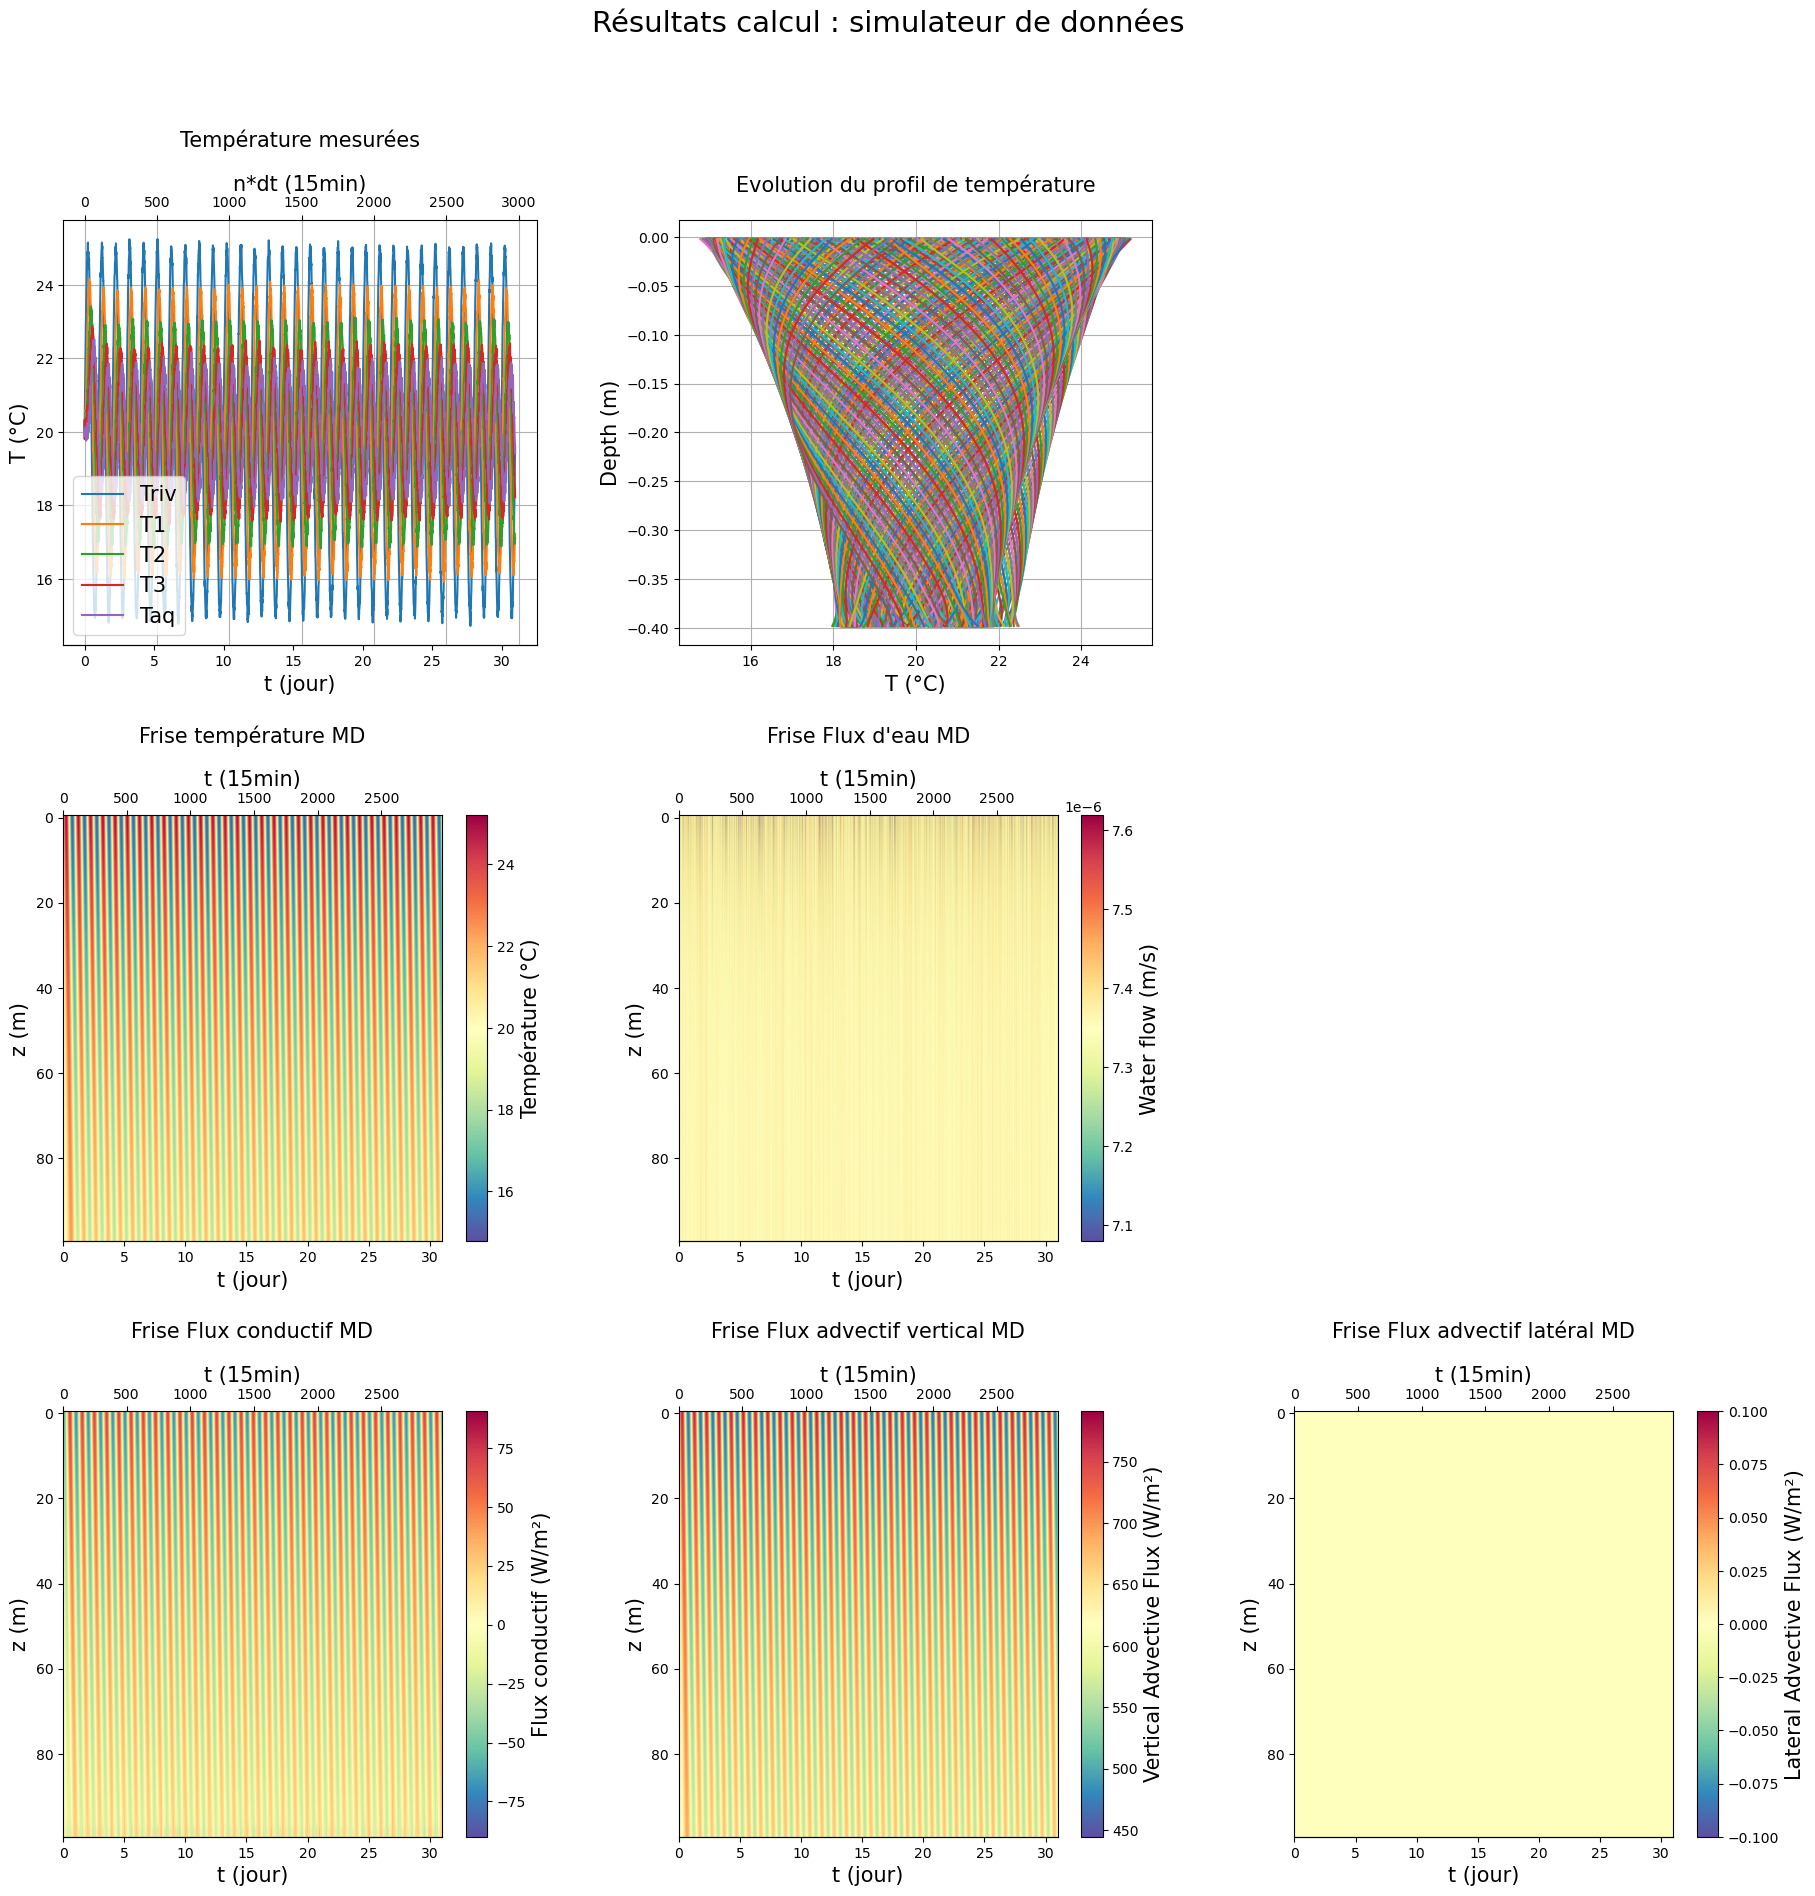

In [20]:
print(emu_observ._molonariT_data)

# on utilise les mesures générées précédemment dans les init "dH_measures" et "T_measures"
newCol_dict = {
	"river_bed": 8., 
    "depth_sensors": depth_sensors, #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": emu_observ._molonariP_data,
    "T_measures": emu_observ._molonariT_data,
    "nb_cells" : nbcells,
    "sigma_meas_P": None, #float
    "sigma_meas_T": None, #float
}
newCol = Column.from_dict(newCol_dict)
newCol.set_layers(Layer1)
newCol.compute_solve_transi(verbose=True)

nt = len(newCol._temperatures[0,:])
dplot=15
newCol.plot_temperatures_umbrella(round(nt/dplot))

flows = newCol.get_flows_solve()
unitLeg="m/s"
title="Débits"
newCol.plot_it_Zt(flows,title,unitLeg,1.04,2)

newCol.print_RMSE_at_sensor()
newCol.plot_compare_temperatures_sensors()
newCol.plot_CALC_results()
newCol.print_in_file_processed_MOLONARI_dataset(zeroT=0)

### Add-On :  `frequency` analysis

In [21]:
from pyheatmy.frequency import frequency_analysis
fa = frequency_analysis()

Frequency analysis module initialized.
This module will analyze a multi-periodic signal to estimate attenuation and phase decay coefficients.
Using phase decay and amplitude attenuation with depth, we'll retrieve kappa_e and v_t for each dominant period.
-------------------------------------
Please use set_inputs(...) to provide the necessary data before analysis.


In [22]:
dates = emu_observ._dates
river = emu_observ._T_riv
temps_all = col.get_temperature_at_sensors()
signals = [river] + [temps_all[i, :] for i in range(1, temps_all.shape[0]-1)]
depths = [0.0] + list(depth_sensors)
signals = np.array(signals)

In [23]:
fa.set_inputs(dates=dates, signals=signals, depths=depths[:-1])

On peut aussi fournir les informations physiques si on les a. En activant `compute_now`, on calcule directement les valeurs de $\kappa_e$ et de $v_t$ attendues.

In [24]:
POROSITE = Layer1.mcmc_params[1]
LAMBDA_S = Layer1.mcmc_params[2]
RHO_CS = Layer1.mcmc_params[3]
K_INTRIN = Layer1.mcmc_params[0]
GRAD_H = - dH_offset / Zbottom  # gradient hydraulique

fa.set_phys_prop(lambda_s=LAMBDA_S,
                 rho_c_s=RHO_CS,
                 k=K_INTRIN,
                 n=POROSITE,
                 gradH=GRAD_H,
                 compute_now=True,
                 verbose=True)

[set_phys_prop] Effective parameters computed:
  kappa_e = 4.537e-07 m²/s
  v_t = 7.642e-06 m/s


Maintenant on peut effectuer les premières actions

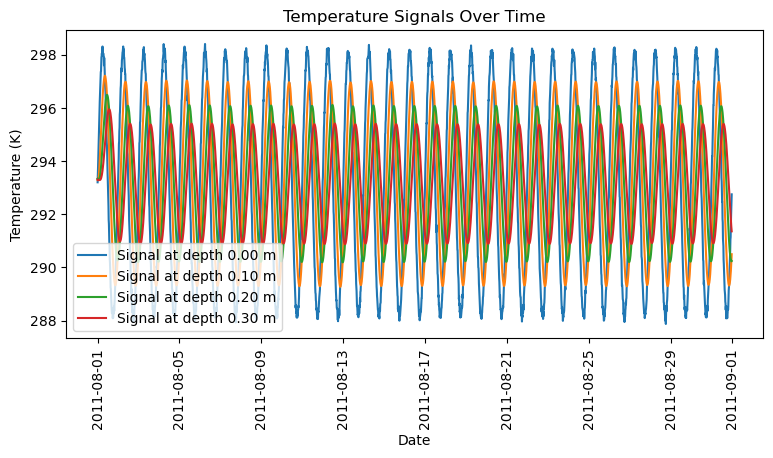

/Users/noedaniel/Desktop/MOLONARI/MOLONARI1D/pyheatmy/pyheatmy/frequency.py:447: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1.0 / (freqs * 86400.0), amp, label=f'Sensor at depth {depths[i]} m')


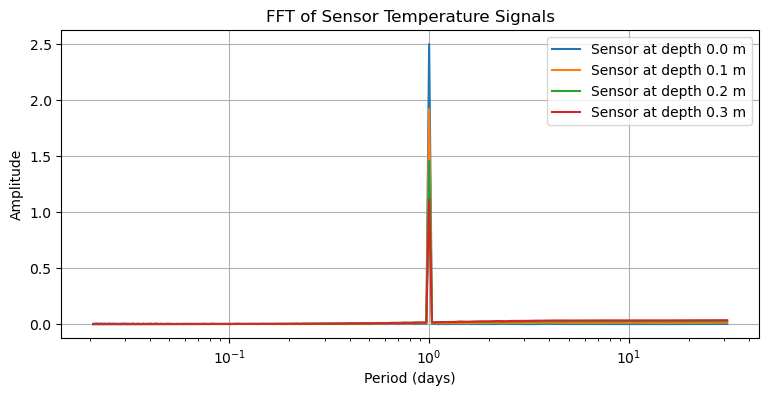

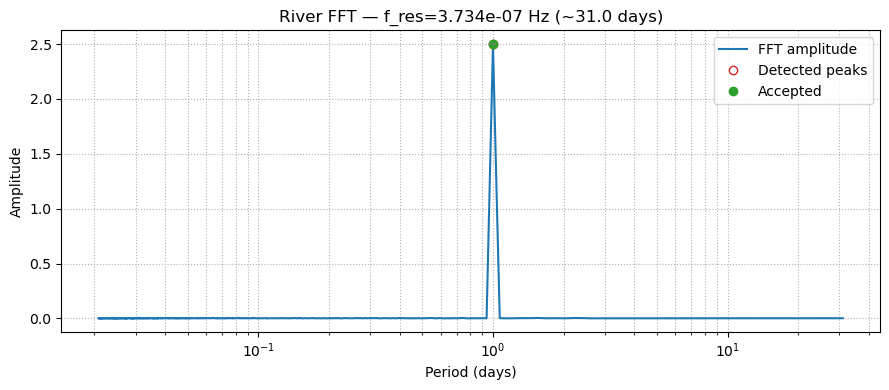

In [25]:
fa.plot_signals()
fa.fft_sensors()
Pd, f0, A0, meta = fa.find_dominant_periods(store=True, compute_phases=True, Q_min = 2, min_cycles=0.2, max_width_rel=1)

This deals only with 1D attenuation (no lateral flow).
Detected depths: [0.  0.1 0.2 0.3]
Amplitudes at dominant periods for each signal computed.
Period 1.00 days: Amplitudes = [2.49996964 1.91862603 1.45785696 1.11009595]


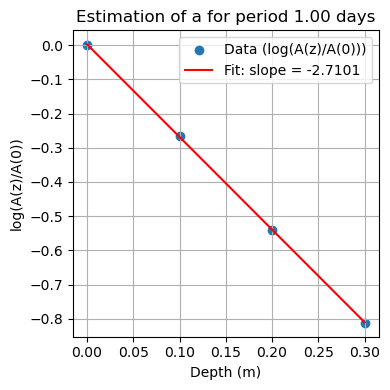

Attenuation coefficients a estimated for each dominant period.
Period 1.00 days: a = 2.7101 1/m
Period 1.00 days: R^2 = 0.9999


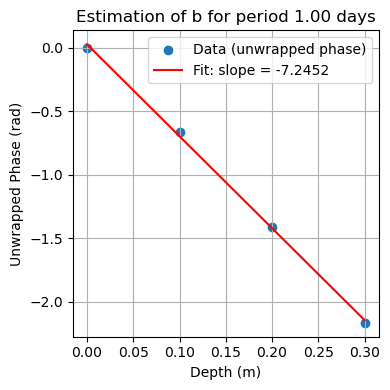

Phase decay coefficients b estimated for each dominant period.
Period 1.00 days: b = 7.2452 rad/m
Period 1.00 days: R^2 = 0.9990
Inversion complete.
Period 1.00 days: kappa_e = 4.546e-07 m^2/s, v_t = 7.573e-06 m/s


In [26]:
a_est, a_R2 = fa.estimate_a(draw=True)     # lit dates/signals/depths/Pd depuis le state
b_est, b_R2 = fa.estimate_b(draw=True)                    # idem
kappa_e, v_t = fa.perform_inversion(verbose=True)         # lit a,b,Pd du state

In [27]:
a_expected, b_expected = fa.phys_to_a_b()
for p, a, b in zip(Pd, a_expected, b_expected):
    print(f"Period {p:.2f} days: expected a = {a} 1/m, b = {b} 1/m")

Period 1.00 days: expected a = 2.673291993697533 1/m, b = 7.223052911400709 1/m


#### Checking dimensionality

You can check if a 2D model is working better than a 1D model or not using `critere_2D`. You can force the origin intercept by turning `intercept=True`.

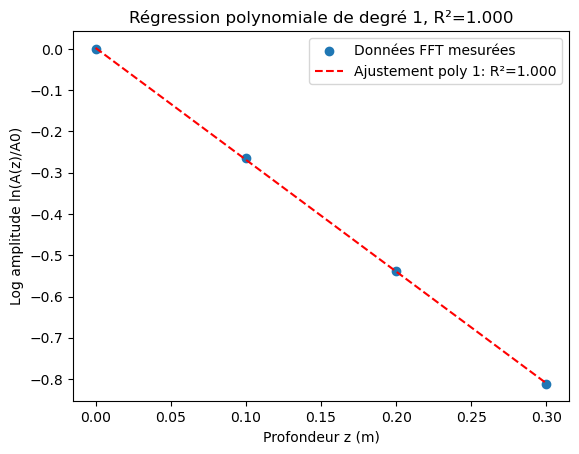

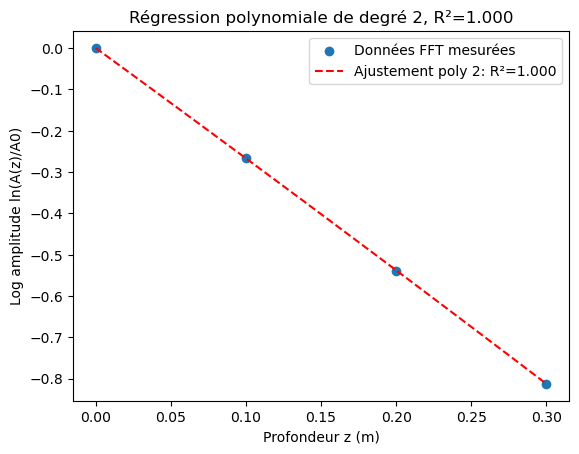

Best model: 1D


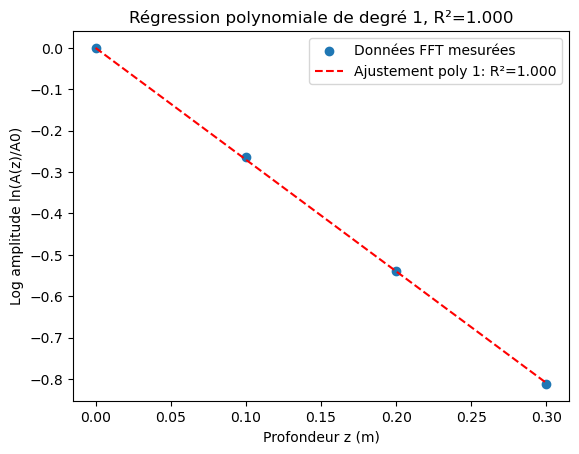

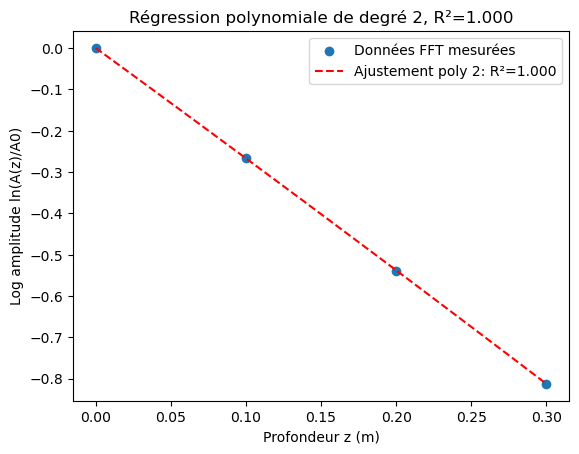

Best model with intercept: 1D


In [28]:
modele = fa.critere_2D(show_reg=True, intercept=False)
print("Best model:", modele["modele"])
modele_intercept = fa.critere_2D(intercept=True, show_reg=True)
print("Best model with intercept:", modele_intercept["modele"])

# Multilayered riverbed -- No printing option activated

## Warning
It seems that there is a bug at the interface between layers and also if a sensor is located at the interface

In [27]:
t_debut = (2011, 8, 1)
t_fin = (2011, 8, 31, 23, 59, 59)
dt = 15*60 # pas de temps en (s)

T_riv_amp = 2
T_riv_offset = 20 + ZERO_CELSIUS
P_T_riv = 72*4*dt

T_aq_amp = 0
T_aq_offset = 14 + ZERO_CELSIUS
P_T_aq = 9999 # à mettre dans le init

dH_amp = 0
dH_offset = 0.1
P_dh = -9999 #14*24*4*dt

Zbottom = 0.6
depth_sensors = [.1, .25, .3, .4, Zbottom] # le code fonctionne avec n capteurs, watch the compatibility with Zbottom

In [ ]:
liste_param_dH = [[dH_offset], [dH_amp, P_dh, 0]]
liste_param_T_riv = [[T_riv_offset], [T_riv_amp, P_T_riv, 0]]
liste_param_T_aq = [[T_aq_offset], [T_aq_amp, P_T_aq, 0]]

time_series_dict_user4 = {
    "offset" : 0,
    "depth_sensors":depth_sensors,
	"param_time_dates": [t_debut, t_fin, dt], 
    "param_dH_signal": liste_param_dH, #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"param_T_riv_signal": liste_param_T_riv,
    "param_T_aq_signal": liste_param_T_aq,
    "sigma_meas_P": 0.05,
    "sigma_meas_T": 0.1, #float
}

param_T_riv_signal is a one level list, generating single periodic signal
Initializing time series of synthetic_MOLONARI
param_time_dates: [(2011, 8, 1), (2011, 8, 31, 23, 59, 59), 900]
param_dH_signal: [0, -9999, 0.1]
param_T_riv_signal: [2, 259200, 293.15]
param_T_aq_signal: [0, 9999, 287.15]
sigma_meas_P: 0.05
sigma_meas_T: 0.1
Entering Hydraulic head differential generation with amplitude 0, period of -9999, offset 0.1, dt 900.0 --> 
constant signal

Single periodic signal detected, using create_periodic_signal function.
Entering T_riv generation with amplitude 2, period of 259200, offset 293.15, dt 900.0 --> 
periodic signal



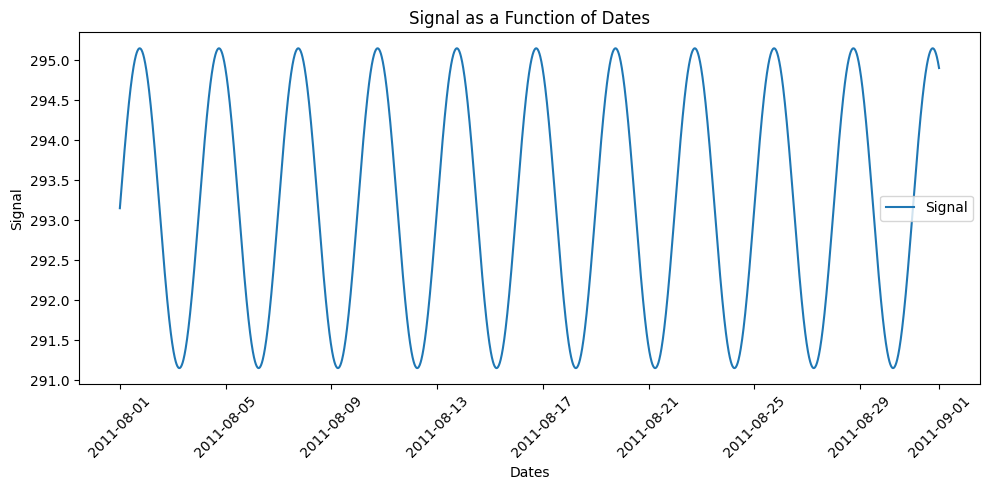

Single periodic signal detected, using create_periodic_signal function.
Entering T_aq generation with amplitude 0, period of 9999, offset 287.15, dt 900.0 --> 
periodic signal



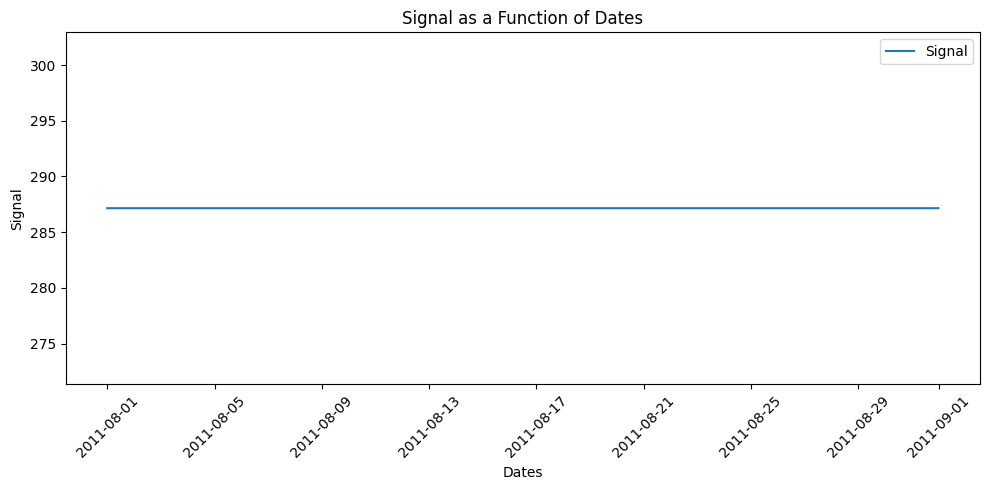

Generating Shaft with 5 sensors
5 sensors in the shaft
Temperature of Sensor 0 : [292.15       292.18635814 292.22269898 ... 293.6447879  293.62835139
 293.61121126]
Temperature of Sensor 1 : [290.65       290.6754507  290.70088929 ... 291.69635153 291.68484597
 291.67284788]
Temperature of Sensor 2 : [290.15       290.17181489 290.19361939 ... 291.04687274 291.03701083
 291.02672676]
Temperature of Sensor 3 : [289.15       289.16454326 289.17907959 ... 289.74791516 289.74134056
 289.7344845 ]
Temperature of Sensor 4 : [287.15 287.15 287.15 ... 287.15 287.15 287.15]


In [29]:
emu_observ_test_user4 = synthetic_MOLONARI.from_dict(time_series_dict_user4)
# emu_observ_test_user4._generate_all_series()



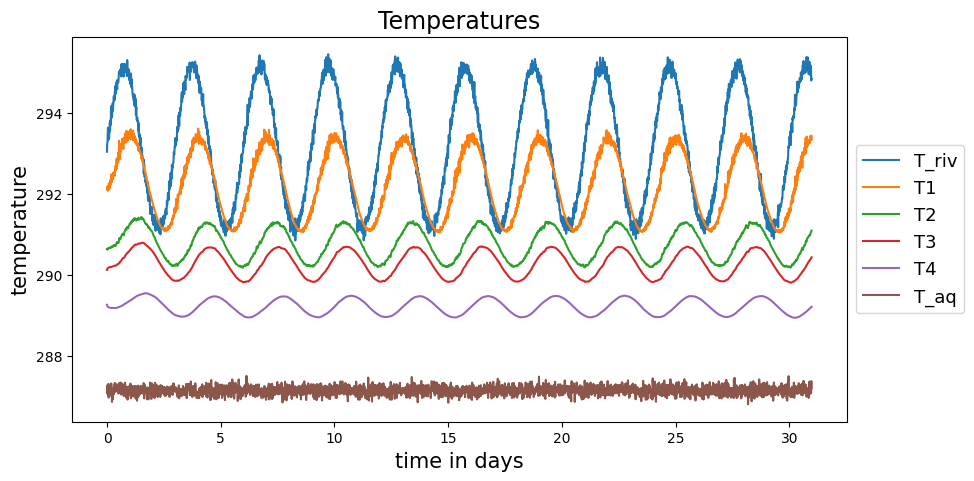

--- Compute Solve Transi ---
gravier : ends at 0.2 m. Param(moinslog10IntrinK=11, n=0.4, lambda_s=2, rhos_cs=4000000.0, q_s=0)
Couche en sable : ends at 0.6 m. Param(moinslog10IntrinK=14, n=0.1, lambda_s=2, rhos_cs=4000000.0, q_s=0)
Hinter [0.080432   0.08039181 0.        ]
conditions aux limites
H_riv [0.080432   0.16346845 0.10593692 ... 0.14010613 0.09475341 0.16519444]
H_aq [0. 0. 0. ... 0. 0. 0.]
échantillons du profondeur: ...  0.195 0.201  ...
le profondeur d'interface:  0.2
type cara asymetric
Done.


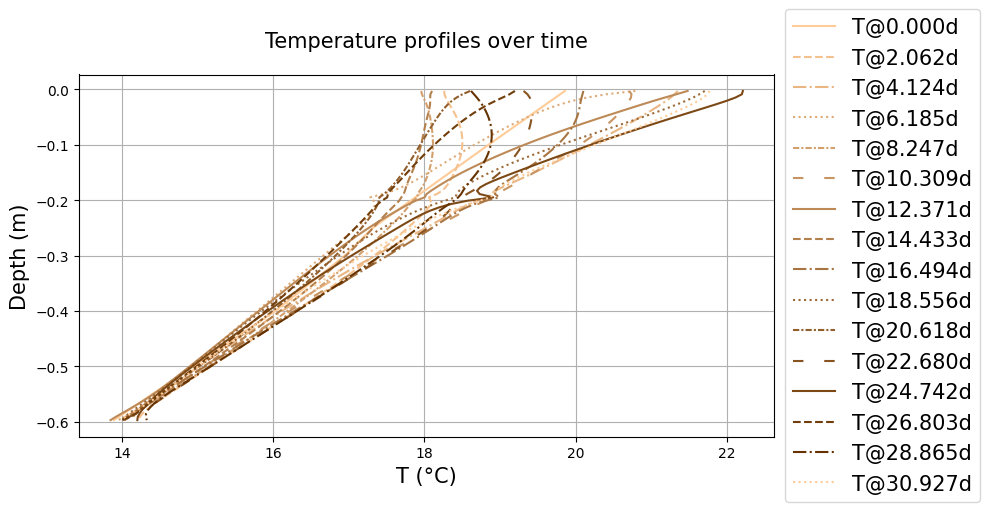

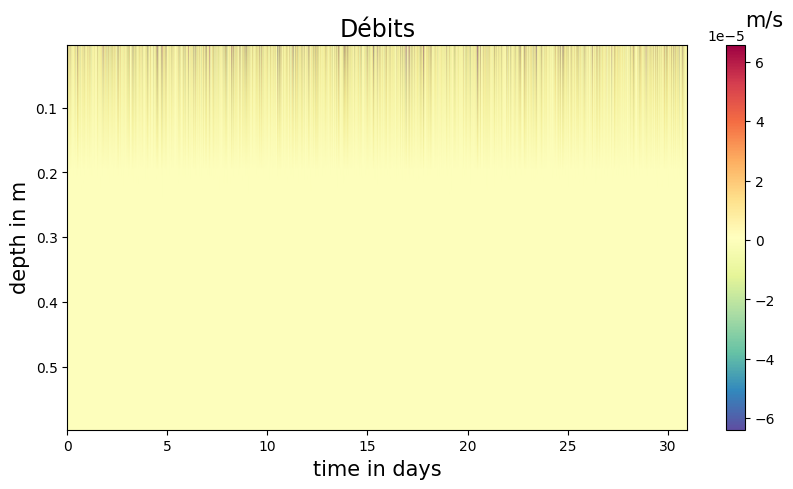

RMSE at sensor 0 : 0.09914736343323921
RMSE at sensor 1 : 0.10064476862212374
RMSE at sensor 2 : 0.10003812872115388
RMSE at sensor 3 : 0.10211681229331182
Total RMSE : 0.10049258639041647
Plotting Température in column. time series have nrecords =  2976


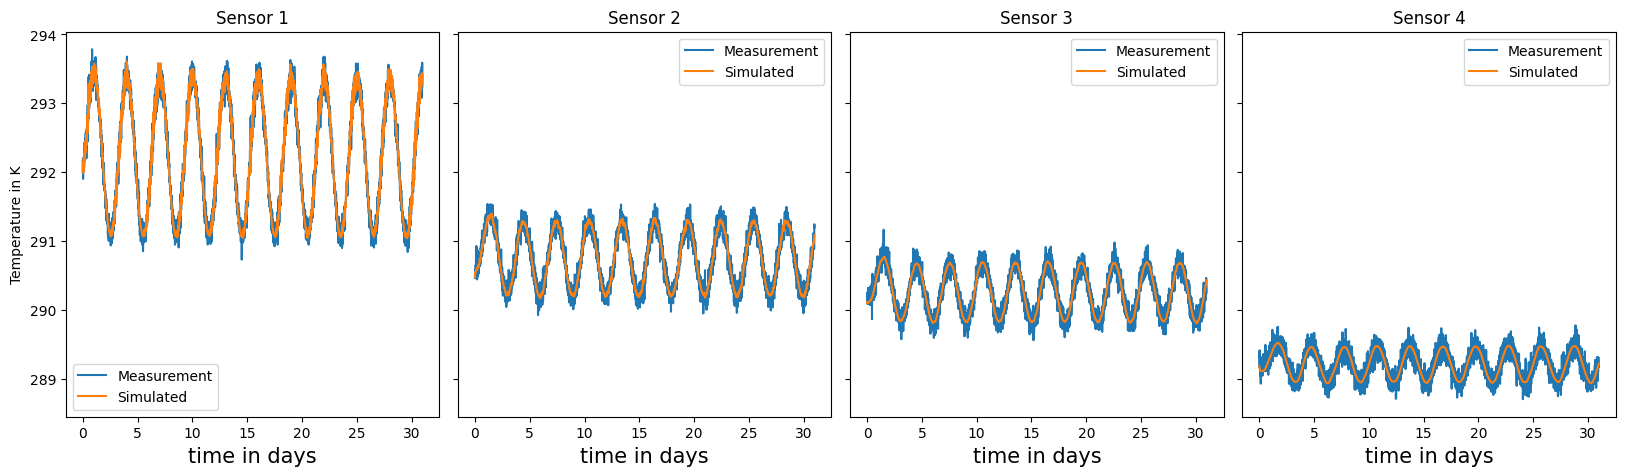

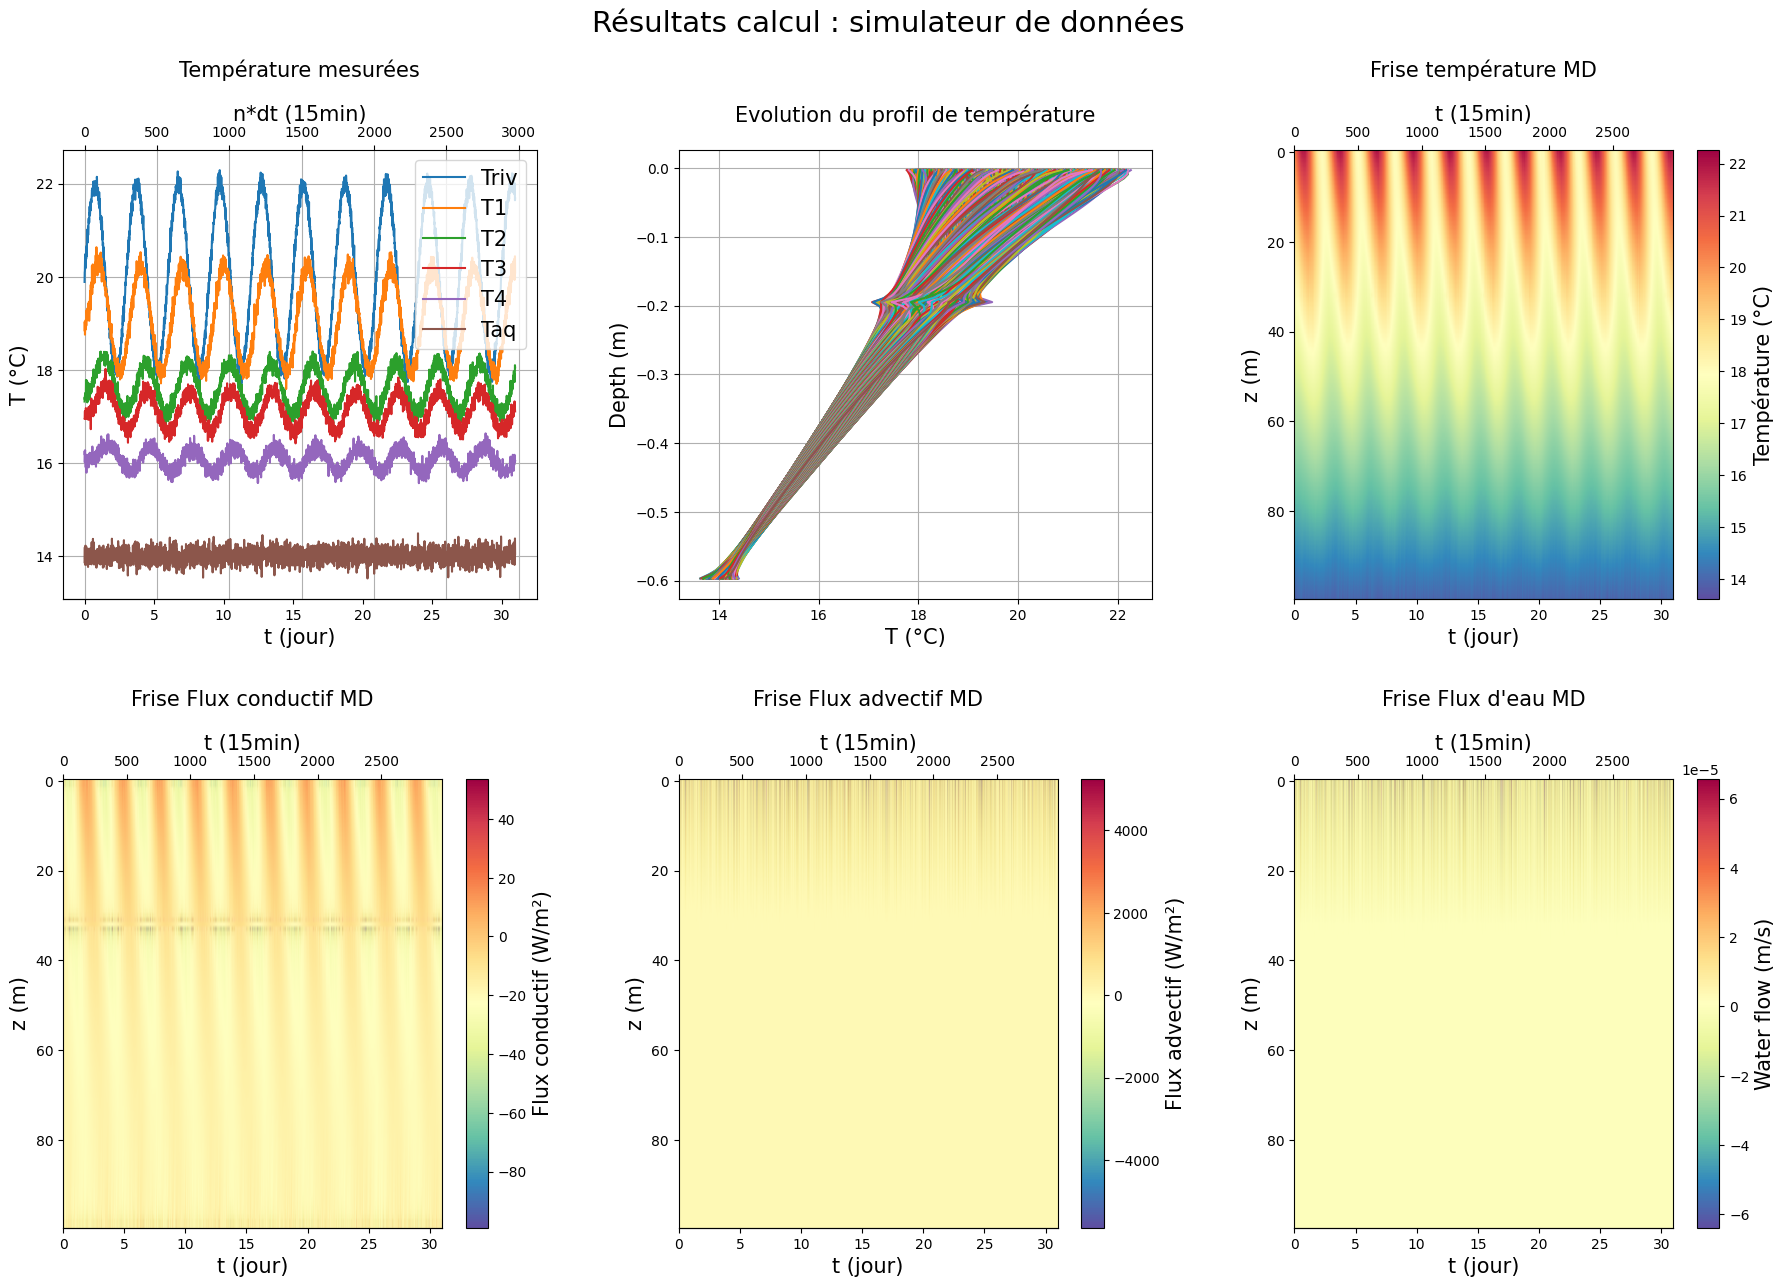

In [30]:
# l'utilisateur génère un dictionnaire avec les données importantes de la colonne
Layer1 = {
    "name": "gravier",
    "zLow": .2,
    "moinslog10IntrinK":11,
    "n": .4,
    "lambda_s": 2,
    "rhos_cs": 4e6,
    "q_s": 0,
}

Layer2 = {
    "name": "Couche en sable",
    "zLow": Zbottom,
    "moinslog10IntrinK":14,
    "n": .1,
    "lambda_s": 2,
    "rhos_cs": 4e6,
    "q_s": 0,
}

# on utilise les mesures générées précédemment
col_dict4 = {
	"river_bed": 1., 
    "depth_sensors": depth_sensors, #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": emu_observ_test_user4._molonariP_data,
    "T_measures": emu_observ_test_user4._molonariT_data,
    "nb_cells" : nbcells,
    "sigma_meas_P": emu_observ_test_user4._sigma_P, #float
    "sigma_meas_T": emu_observ_test_user4._sigma_T, #float
}

col4 = Column.from_dict(col_dict4)

# modèle une couche
col4.set_layers([Layer.from_dict(Layer1),Layer.from_dict(Layer2)])

# print(emu_observ_test_user1._T_Shaft)
emu_observ_test_user4._measures_column_one_layer(col4)
#emu_observ_test_user1._plot_molonariT_data()
col4.plot_temperature_at_sensors(verbose=False)


# on utilise les mesures générées précédemment dans les init "dH_measures" et "T_measures"
newCol4_dict = {
	"river_bed": 1., 
    "depth_sensors": depth_sensors, #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": emu_observ_test_user4._molonariP_data,
    "T_measures": emu_observ_test_user4._molonariT_data,
    "nb_cells" : nbcells,
    "sigma_meas_P": None, #float
    "sigma_meas_T": None, #float
}
ncol4 = Column.from_dict(newCol4_dict)
ncol4.set_layers([Layer.from_dict(Layer1),Layer.from_dict(Layer2)])
ncol4.compute_solve_transi(verbose=True)

nt = len(ncol4._temperatures[0,:])
dplot=15
ncol4.plot_temperatures_umbrella(round(nt/dplot))

flows = ncol4.get_flows_solve()
unitLeg="m/s"
title="Débits"
ncol4.plot_it_Zt(flows,title,unitLeg,1.04,2)

ncol4.print_RMSE_at_sensor()
ncol4.plot_compare_temperatures_sensors()
ncol4.plot_CALC_results()
#ncol4.print_in_file_processed_MOLONARI_dataset(zeroT=0) #No printing of the multilayer case study for the usage of demoInversion.ipynb


